In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action = 'ignore')
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse


from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PowerTransformer
import plotly.express as px

In [2]:
df = pd.read_csv('D:\GL\Hackathon\\Training_Data_Set.csv')

In [3]:
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [4]:
df.shape

(53515, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [6]:
df=df.replace("None",np.NaN)

In [7]:
df.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type               object
Vroom Audit Rating       int64
transmission            object
door_count              object
seat_count              object
fuel_type               object
Price                  float64
dtype: object

In [8]:
df['Vroom Audit Rating'] = df['Vroom Audit Rating'].astype(np.object)
df['manufacture_year'] = df['manufacture_year'].astype(object) 

In [9]:
df.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year        object
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type               object
Vroom Audit Rating      object
transmission            object
door_count              object
seat_count              object
fuel_type               object
Price                  float64
dtype: object

In [10]:
df.isnull().sum()/ len(df) * 100

Id                      0.000000
Maker                   0.000000
model                   0.000000
Location                0.000000
Distance                2.262917
Owner Type              0.000000
manufacture_year        0.000000
Age of car              0.000000
engine_displacement     0.000000
engine_power            2.688966
body_type              92.271326
Vroom Audit Rating      0.000000
transmission            0.000000
door_count             14.078296
seat_count             15.903952
fuel_type               0.000000
Price                   0.000000
dtype: float64

In [11]:
df.drop('body_type', axis = 1, inplace= True )

In [12]:
df_copy = df.copy()

In [13]:
# Median Impiutation
df['engine_power'].fillna(df['engine_power'].median(), inplace = True)

In [14]:
df['Distance '].fillna(df['Distance '].median(), inplace = True)

In [15]:
df['door_count'].fillna(str(int(df['door_count'].median())), inplace = True)

In [16]:
df['seat_count'].fillna(str(int(df['seat_count'].median())), inplace = True)

In [17]:
df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df['seat_count'].value_counts()

5    47335
4     4467
7      852
2      725
3      109
6       23
9        2
1        1
8        1
Name: seat_count, dtype: int64

In [20]:
df.drop('Id', axis = 1, inplace = True)

In [21]:
df.columns

Index(['Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type', 'Price'],
      dtype='object')

In [22]:
df_car = df.copy()

In [23]:
df_numeric = df.select_dtypes(np.number)

In [24]:
df_cat = df.select_dtypes(np.object)

In [25]:
df_numeric.columns

Index(['Distance ', 'Age of car', 'engine_displacement', 'engine_power',
       'Price'],
      dtype='object')

In [26]:
df_numeric.describe()

,Distance,Age of car,engine_displacement,engine_power,Price
count,5.351500e+04,53515.000000,53515.000000,53515.000000,5.351500e+04
mean,9.388942e+04,8.591890,1904.049014,100.194282,1.098084e+06
std,2.724601e+05,4.650322,1496.564596,44.743107,8.441565e+05
min,0.000000e+00,3.000000,14.000000,10.000000,3.000000e+00
25%,1.650700e+04,5.000000,1395.000000,74.000000,5.051812e+05
50%,6.552000e+04,8.000000,1896.000000,91.000000,8.854552e+05
75%,1.333040e+05,11.000000,1995.000000,125.000000,1.477829e+06
max,9.899800e+06,85.000000,32000.000000,896.000000,2.212078e+07


### Univariate Analysis

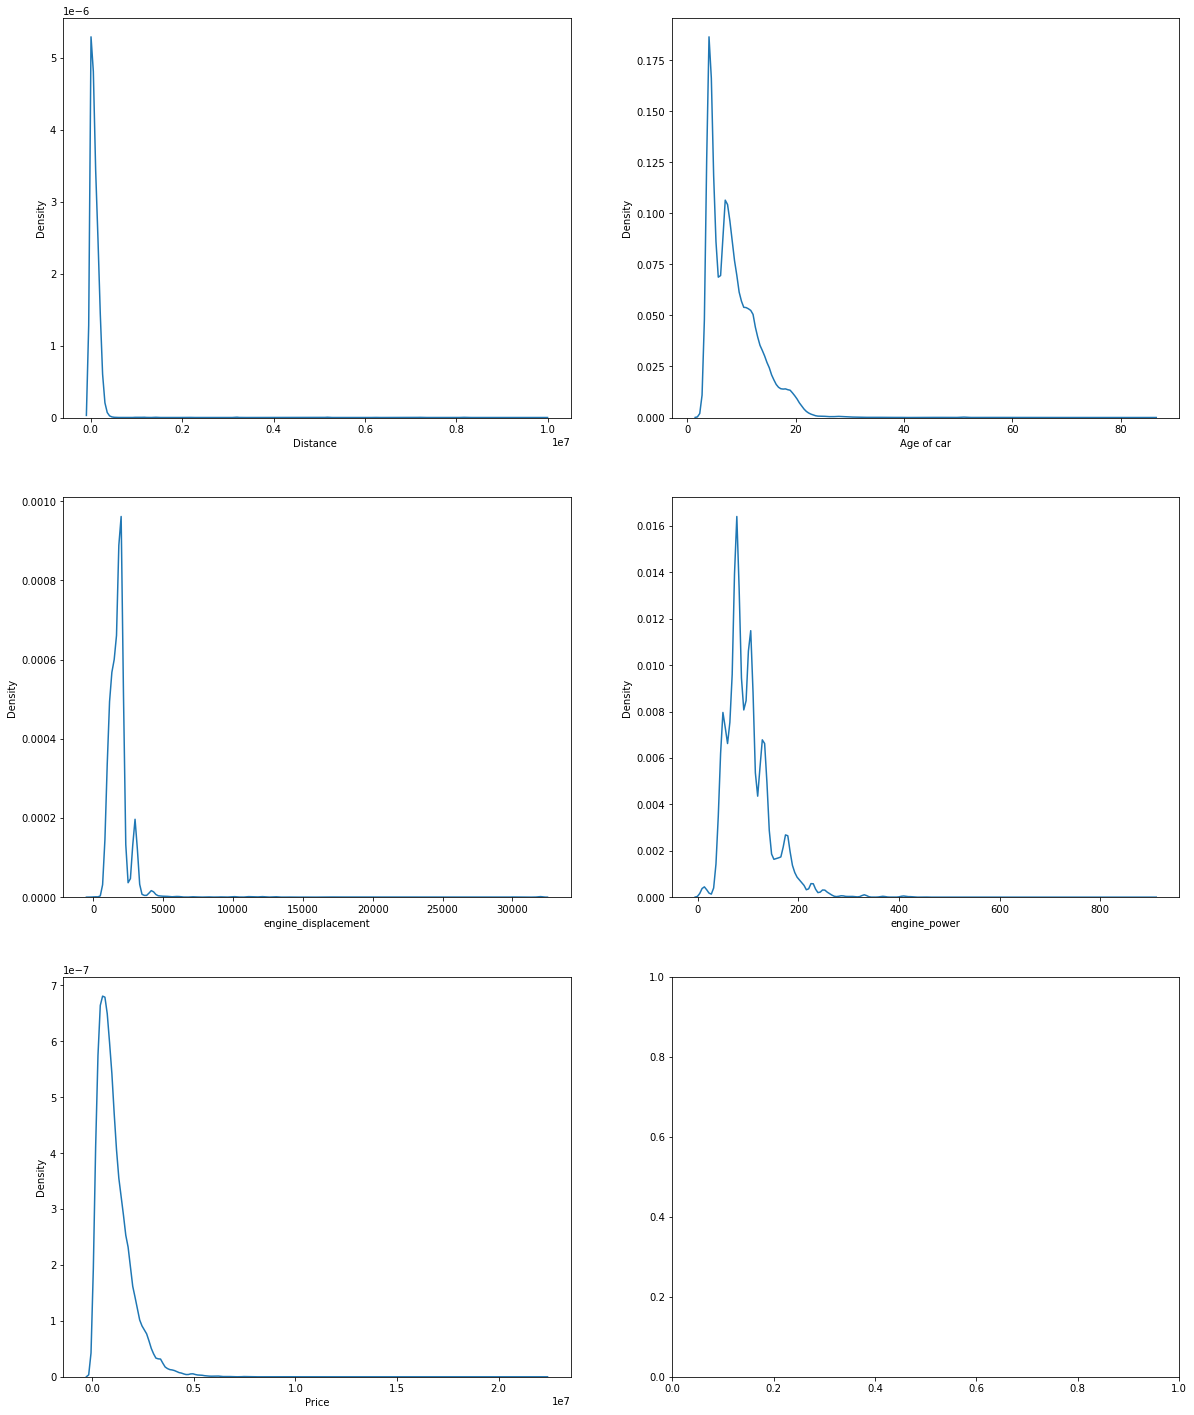

In [27]:
fig, ax = plt.subplots(nrows = 3, ncols=2,figsize=(20,25))
for var, subplot in zip(df_numeric.columns[:], ax.flatten()):
    sns.kdeplot(df[var], ax = subplot)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

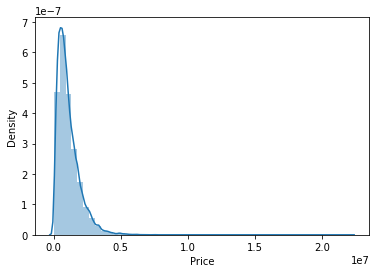

In [28]:
sns.distplot(df_numeric.Price)

In [29]:
df.head()

,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,skoda,octavia,Ahmedabad,65520.0,Second,1964,55,1964,147.0,8,man,4,5,petrol,543764.25
1,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,6,man,4,4,petrol,401819.25
2,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,7,auto,4,5,diesel,2392855.50
3,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,7,man,4,5,petrol,958606.50
4,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,7,auto,4,5,diesel,3085561.50


In [30]:
df_cat.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'manufacture_year',
       'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type'],
      dtype='object')

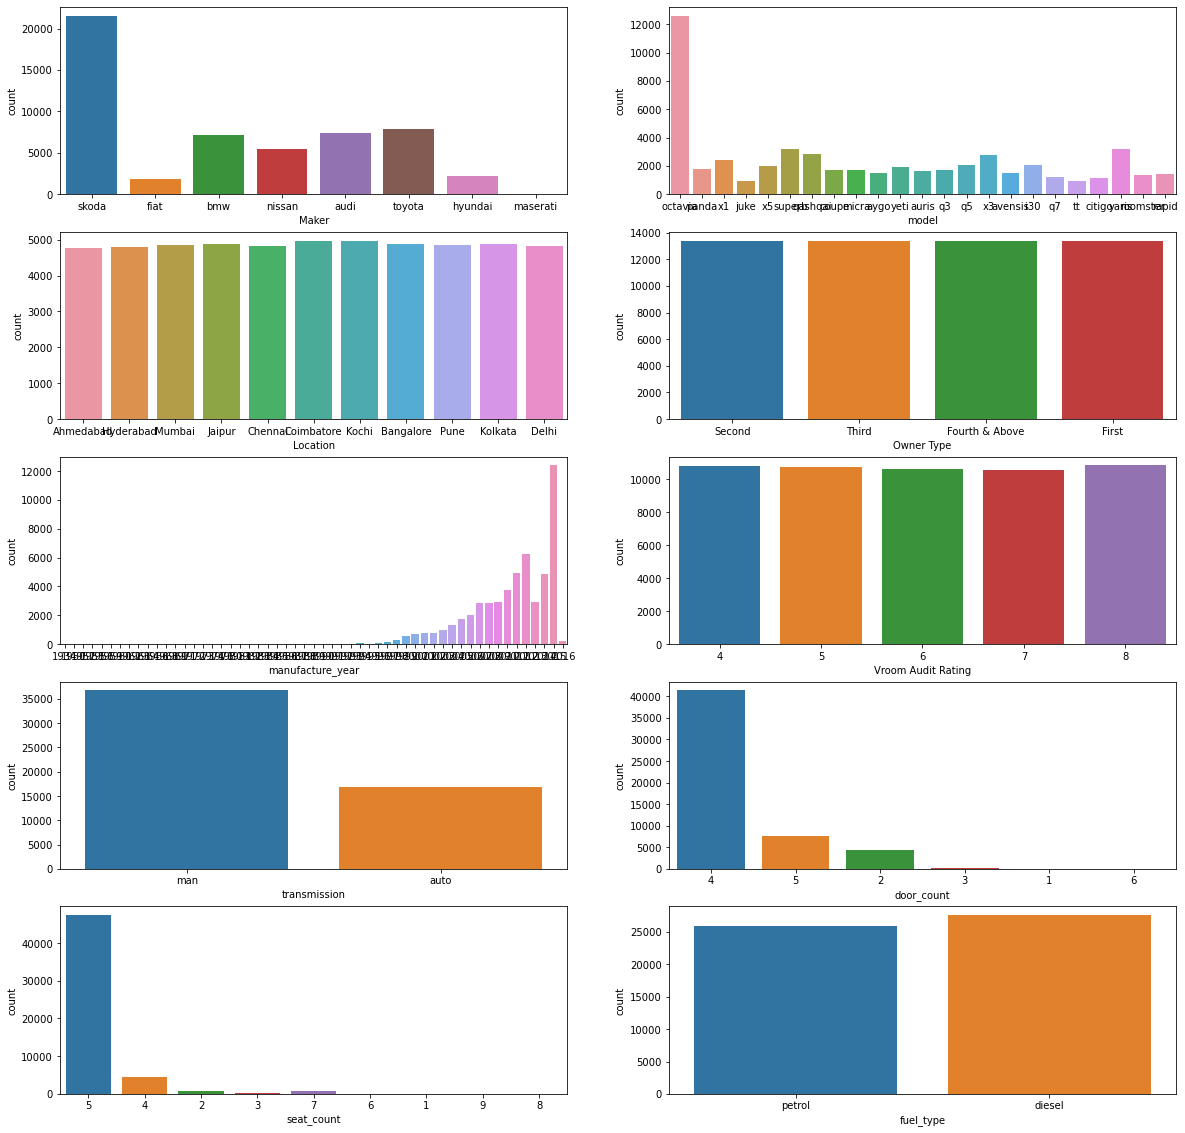

In [31]:
fig , ax = plt.subplots(nrows = 5, ncols=2, figsize=(20,20))
for var, subplt  in zip(df_cat.columns[:], ax.flatten()):
    sns.countplot(df_cat[var], ax = subplt)
plt.show()

In [32]:
df['fuel_type'].value_counts(normalize= True)

diesel    0.514977
petrol    0.485023
Name: fuel_type, dtype: float64

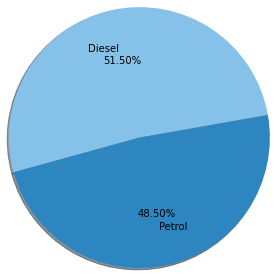

In [33]:
color =['#85C1E9','#2E86C1']
plt.pie(df['fuel_type'].value_counts(normalize= True), labels=['Diesel','Petrol'], autopct='%0.2f%%', radius=1.5, labeldistance=0.7, shadow=True, colors=color,startangle=10)
plt.show()

In [34]:
dfe = df.copy()

In [35]:
dfe.dtypes

Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year        object
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating      object
transmission            object
door_count              object
seat_count              object
fuel_type               object
Price                  float64
dtype: object

In [36]:
dfe.head()

,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,skoda,octavia,Ahmedabad,65520.0,Second,1964,55,1964,147.0,8,man,4,5,petrol,543764.25
1,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,6,man,4,4,petrol,401819.25
2,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,7,auto,4,5,diesel,2392855.50
3,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,7,man,4,5,petrol,958606.50
4,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,7,auto,4,5,diesel,3085561.50


### Bivariate Analysis

<AxesSubplot:xlabel='engine_power', ylabel='Price'>

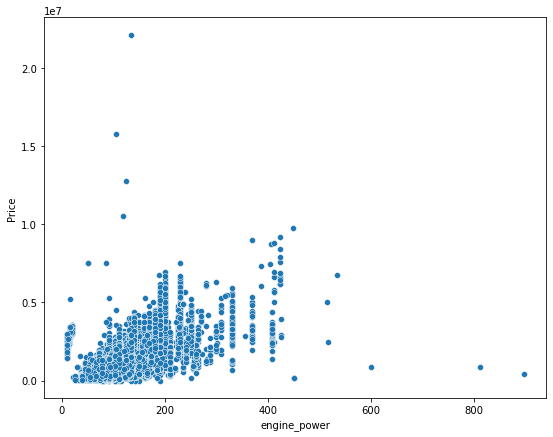

In [37]:
plt.figure(figsize=(9,7))
sns.scatterplot(dfe['engine_power'], df['Price'])

In [38]:
# There is a relationship between engine power and Price of the car. More the engine power, higher the price.

<AxesSubplot:xlabel='engine_power', ylabel='engine_displacement'>

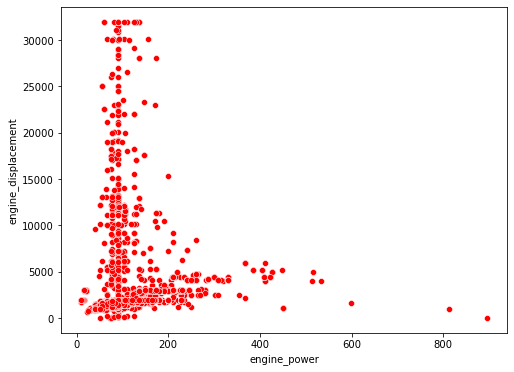

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfe['engine_power'], df['engine_displacement'], color='red')

<AxesSubplot:xlabel='fuel_type', ylabel='engine_displacement'>

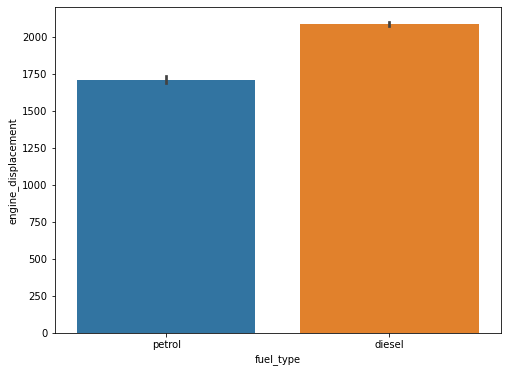

In [110]:
plt.figure(figsize=(8,6))
sns.barplot(dfe['fuel_type'], df['engine_displacement'])

<AxesSubplot:xlabel='transmission', ylabel='engine_displacement'>

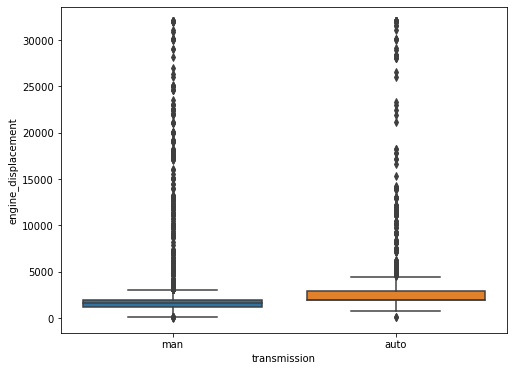

In [112]:
plt.figure(figsize=(8,6))
sns.barplot(df['transmission'], df['engine_displacement'])

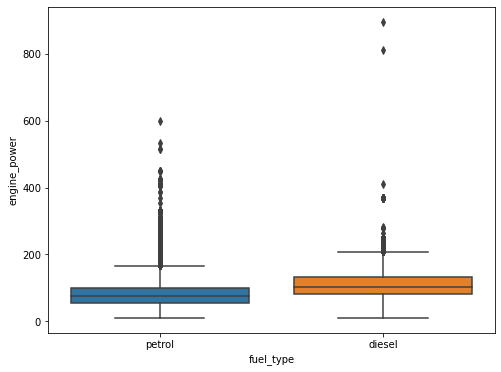

In [58]:
plt.figure(figsize=(8,6))
sns.boxplot(df['fuel_type'],df['engine_power'])
plt.show()

In [ ]:
# Diesel engines are comapartively more powerful.

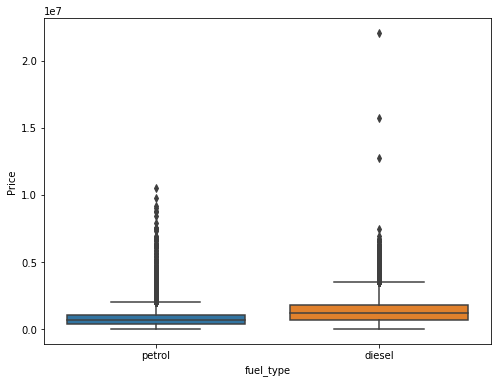

In [61]:
plt.figure(figsize=(8,6))
sns.boxplot(df['fuel_type'],dfe['Price'])
plt.show()

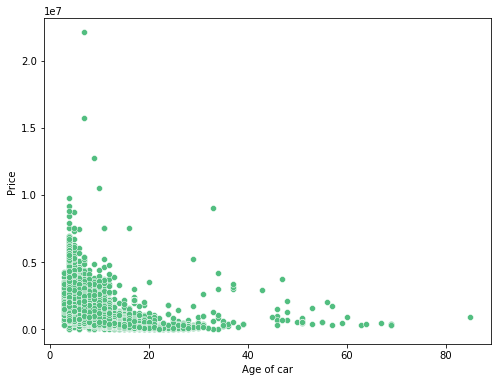

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['Age of car'],dfe['Price'], color = '#52BE80')
plt.show()

<AxesSubplot:xlabel='engine_displacement', ylabel='Price'>

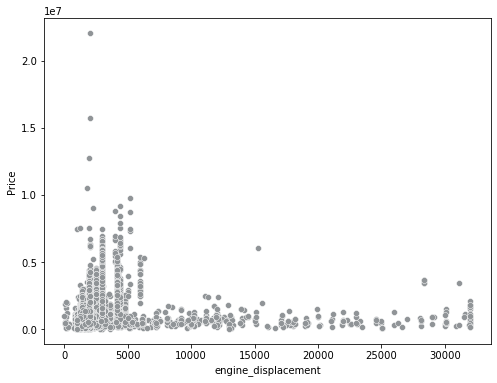

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot( dfe['engine_displacement'], dfe['Price'], color ='#909497')

<AxesSubplot:xlabel='Price', ylabel='transmission'>

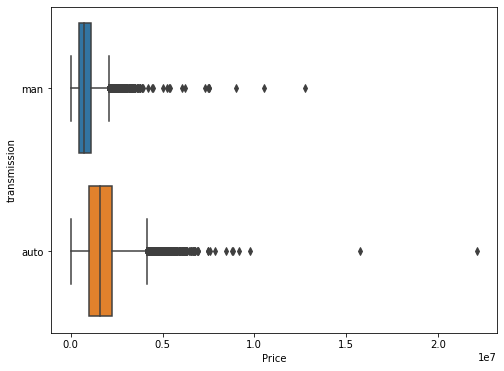

In [59]:
plt.figure(figsize=(8,6))
sns.boxplot( dfe['Price'], dfe['transmission'])

In [ ]:
# Cars with automatic transmission are having higher price than cars haviong manual transmission.

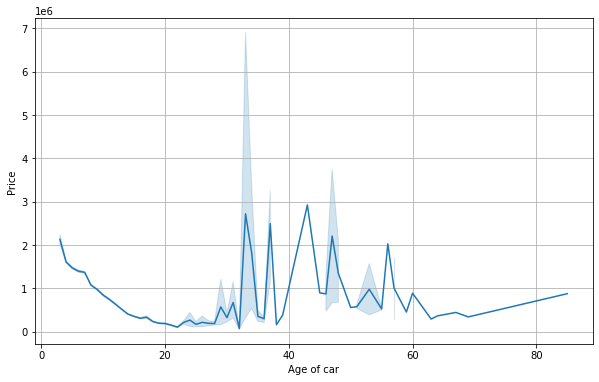

In [83]:
plt.figure(figsize=(10,6))
sns.lineplot(df['Age of car'], df['Price'])
plt.grid()

<AxesSubplot:xlabel='Owner Type', ylabel='Age of car'>

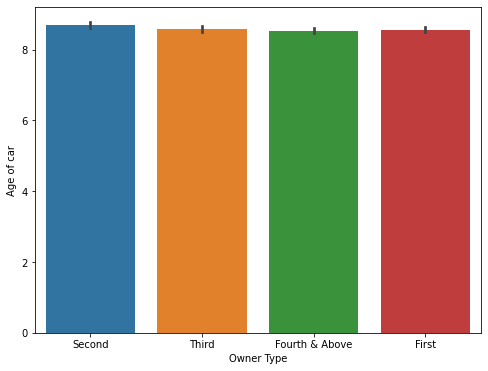

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(df['Owner Type'], df['Age of car'])

<AxesSubplot:xlabel='model', ylabel='Price'>

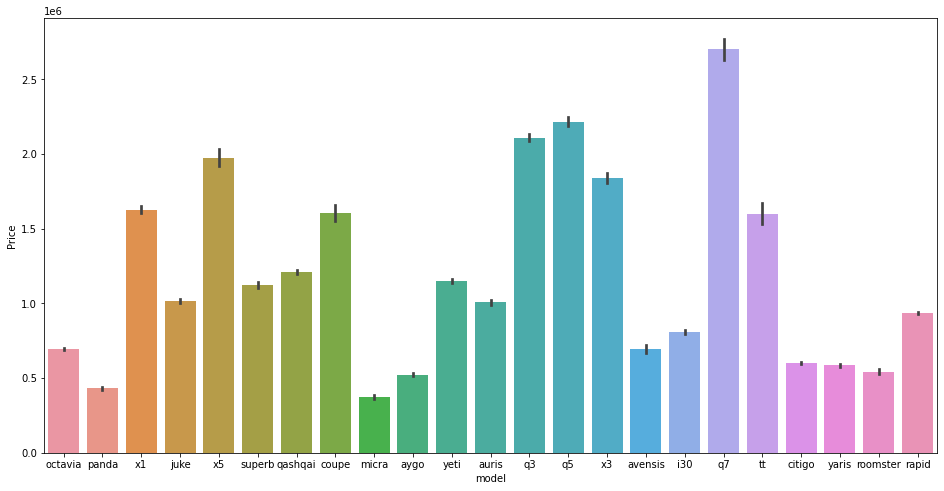

In [76]:
plt.figure(figsize=(16,8))
sns.barplot(df['model'], df['Price'])

Maker      audi   bmw  fiat  hyundai  maserati  nissan  skoda  toyota
fuel_type                                                            
diesel     4874  6181   266      801         0    2102  11644    1691
petrol     2452   997  1579     1439        38    3383   9919    6149


<AxesSubplot:xlabel='fuel_type'>

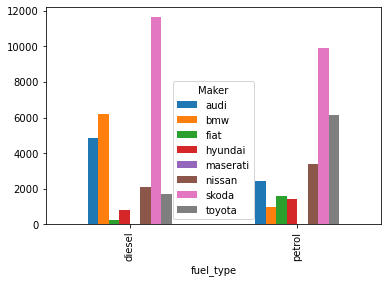

In [100]:
#plt.figure(figsize=(16,8))
#sns.barplot(df['fuel_type'], df['Maker'])
table1 = pd.crosstab(index = df['fuel_type'], columns = df['Maker'])
print(table1)
table1.plot(kind='bar')

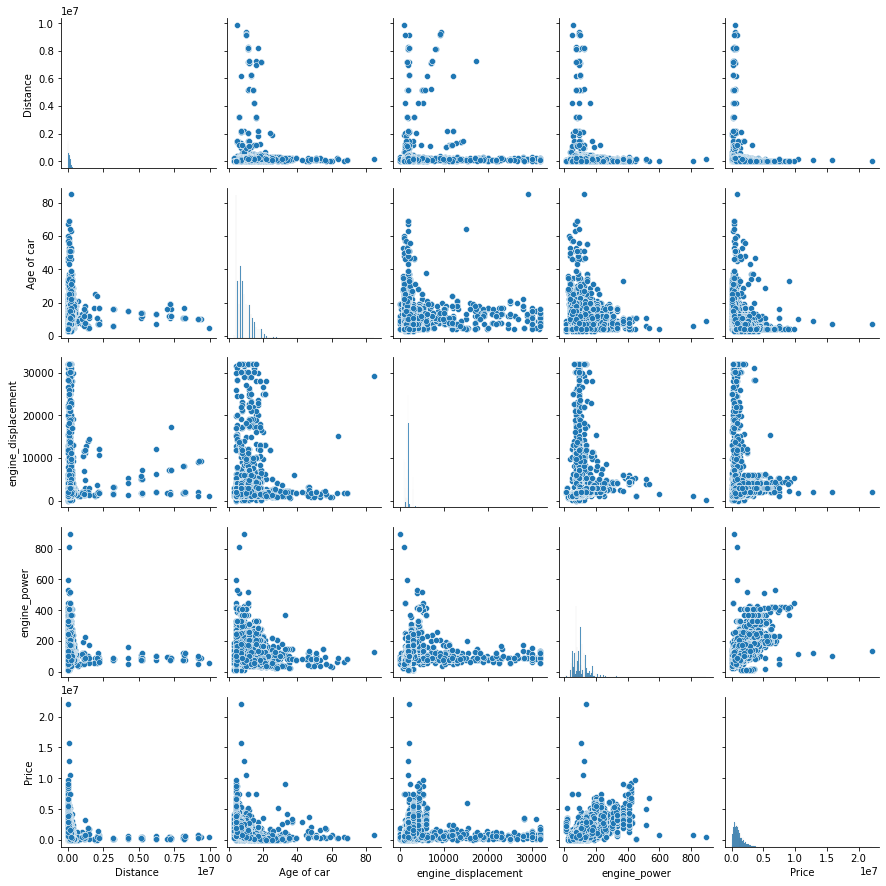

In [66]:
sns.pairplot(df.select_dtypes(include = np.number))

### Multivariate Analysis

In [85]:
dfe.dtypes

Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year        object
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating      object
transmission            object
door_count              object
seat_count              object
fuel_type               object
Price                  float64
dtype: object

<AxesSubplot:xlabel='engine_power', ylabel='Price'>

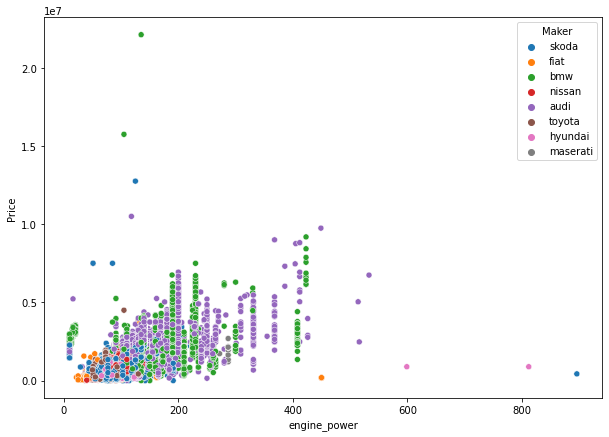

In [106]:
plt.figure(figsize=(10,7))
sns.scatterplot(dfe['engine_power'], df['Price'], hue =df['Maker'])

<AxesSubplot:xlabel='engine_power', ylabel='Price'>

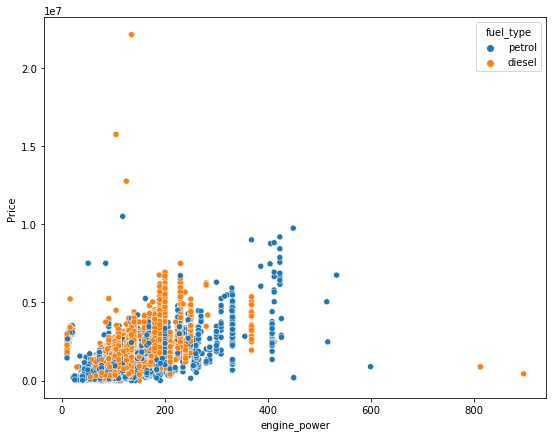

In [101]:
plt.figure(figsize=(9,7))
sns.scatterplot(dfe['engine_power'], df['Price'], hue =df['fuel_type'])

<AxesSubplot:xlabel='transmission', ylabel='engine_displacement'>

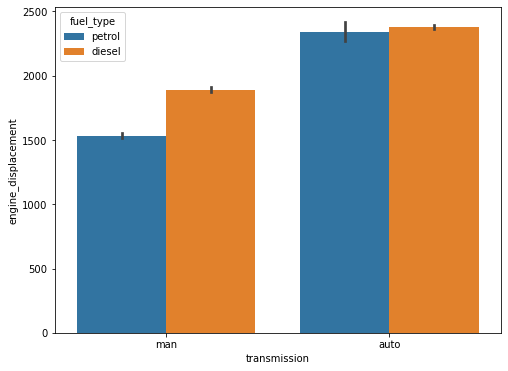

In [113]:
plt.figure(figsize=(8,6))
sns.barplot(df['transmission'], df['engine_displacement'], hue =df['fuel_type'] )

### Outlier Check

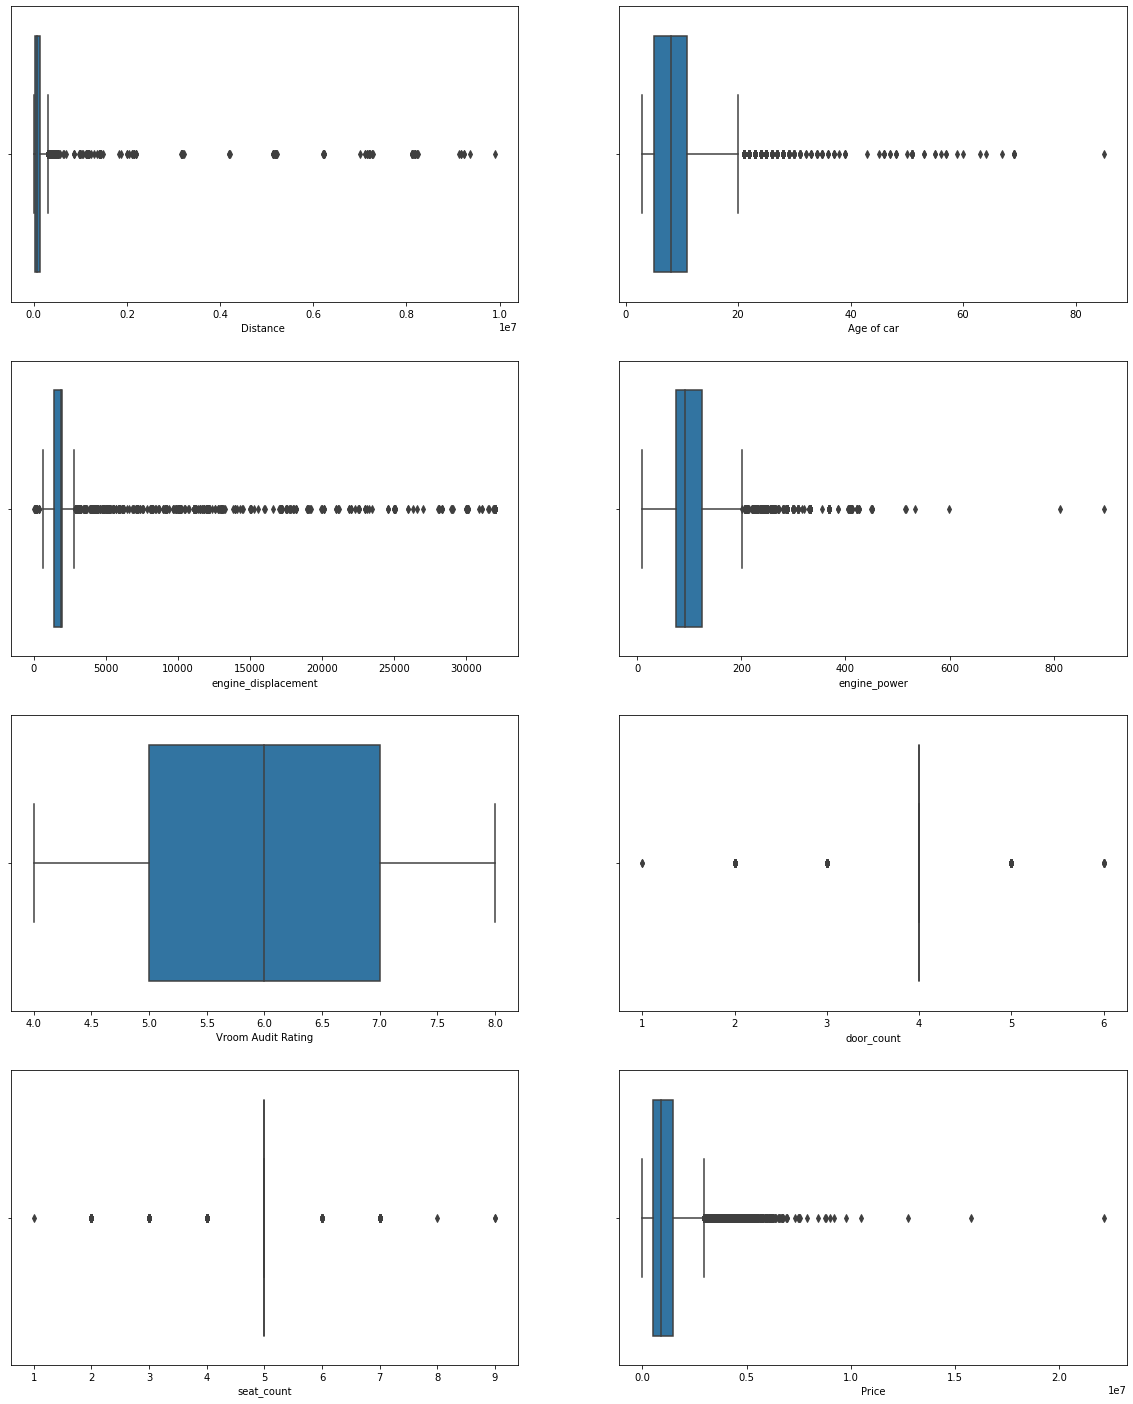

In [32]:
fig, ax = plt.subplots(nrows = 4, ncols=2,figsize=(20,25))
for var, subplot in zip(df_numeric.columns[:], ax.flatten()):
    sns.boxplot(df[var], ax = subplot)
plt.show()

In [33]:
df_numeric.skew()

Distance               23.602915
Age of car              1.912556
engine_displacement    12.730460
engine_power            1.791230
Vroom Audit Rating      0.004991
door_count             -1.476405
seat_count             -1.841611
Price                   2.179997
dtype: float64

### Correlation Check

<AxesSubplot:>

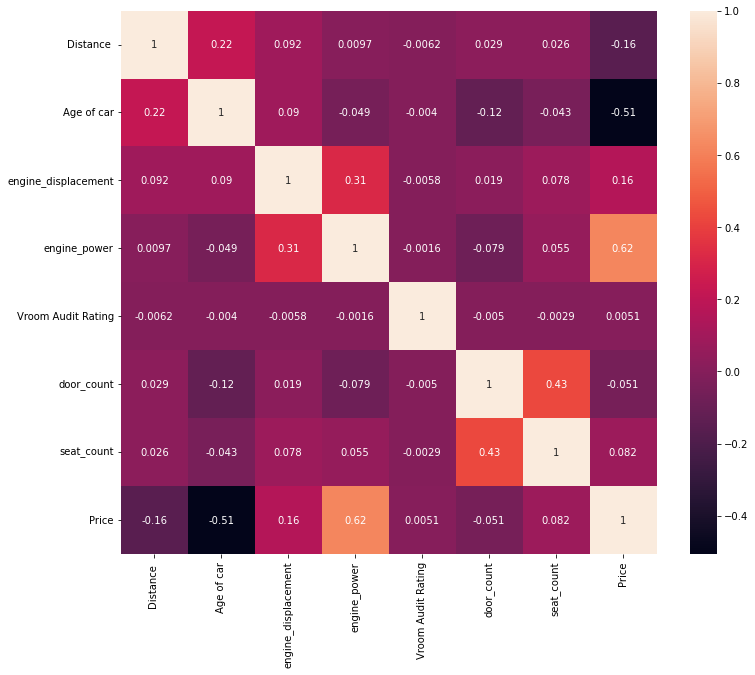

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(), annot = True)

In [35]:
df.head()

,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,skoda,octavia,Ahmedabad,65520.0,Second,1964,55,1964,147.0,8,man,4.0,5.0,petrol,543764.25
1,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,6,man,4.0,4.0,petrol,401819.25
2,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,7,auto,4.0,5.0,diesel,2392855.50
3,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,7,man,4.0,5.0,petrol,958606.50
4,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,7,auto,4.0,5.0,diesel,3085561.50


In [183]:
df_numeric.describe()

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count
count,5.351500e+04,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000
mean,9.388942e+04,8.591890,1904.049014,100.194282,5.998374,3.976810,4.904214
std,2.724601e+05,4.650322,1496.564596,44.743107,1.418336,0.686609,0.519187
min,0.000000e+00,3.000000,14.000000,10.000000,4.000000,1.000000,1.000000
25%,1.650700e+04,5.000000,1395.000000,74.000000,5.000000,4.000000,5.000000
50%,6.552000e+04,8.000000,1896.000000,91.000000,6.000000,4.000000,5.000000
75%,1.333040e+05,11.000000,1995.000000,125.000000,7.000000,4.000000,5.000000
max,9.899800e+06,85.000000,32000.000000,896.000000,8.000000,6.000000,9.000000


In [186]:
df_numeric['seat_count'].value_counts()

5.0    47335
4.0     4467
7.0      852
2.0      725
3.0      109
6.0       23
9.0        2
1.0        1
8.0        1
Name: seat_count, dtype: int64

In [37]:
df_cat.describe()

,Maker,model,Location,Owner Type,manufacture_year,transmission,fuel_type
count,53515,53515,53515,53515,53515,53515,53515
unique,8,23,11,4,55,2,2
top,skoda,octavia,Coimbatore,First,2015,man,diesel
freq,21563,12619,4976,13406,12387,36734,27559


In [38]:
df_category = df_cat.copy()

### Encoding of Categorical variables

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
LE = LabelEncoder()
df_cat['Maker'] = LE.fit_transform(df_cat['Maker'])
df_cat['model'] = LE.fit_transform(df_cat['model'])
df_cat['Location'] = LE.fit_transform(df_cat['Location'])
df_cat['Owner Type'] = LE.fit_transform(df_cat['Owner Type'])
df_cat['manufacture_year'] = LE.fit_transform(df_cat['manufacture_year'])

In [41]:
df_cat.head()

,Maker,model,Location,Owner Type,manufacture_year,transmission,fuel_type
0,6,8,0,2,9,man,petrol
1,2,9,0,3,50,man,petrol
2,1,18,5,3,52,auto,diesel
3,5,6,9,3,49,man,petrol
4,1,20,6,1,50,auto,diesel


In [42]:
df_dummy = pd.get_dummies(df_cat, drop_first=True)

In [43]:
df_dummy.head()

,Maker,model,Location,Owner Type,manufacture_year,transmission_man,fuel_type_petrol
0,6,8,0,2,9,1,1
1,2,9,0,3,50,1,1
2,1,18,5,3,52,0,0
3,5,6,9,3,49,1,1
4,1,20,6,1,50,0,0


In [44]:
df_target = df_numeric.Price

In [45]:
df_numeric.drop('Price', axis = 1, inplace=True)

### Scaling of Numercial Features

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
ss = StandardScaler()
scaled = ss.fit_transform(df_numeric)

In [48]:
scaled_df = pd.DataFrame(scaled, columns=df_numeric.columns)

In [49]:
scaled_df.head()

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count
0,-0.104124,9.979640,0.040059,1.046109,1.411263,0.033775,0.184494
1,-0.242751,-0.342321,-0.442383,-1.099493,0.001146,0.033775,-1.741610
2,-0.175768,-0.772403,0.060774,0.107408,0.706204,0.033775,0.184494
3,-0.183296,-0.127281,-0.191139,0.889659,0.706204,0.033775,0.184494
4,-0.126131,-0.342321,0.727641,1.783659,0.706204,0.033775,0.184494


In [50]:
scaled_df.shape

(53515, 7)

In [51]:
#df_target = scaled_df['Price']

In [52]:
#scaled_df.drop('Price', axis = 1, inplace= True)

In [53]:
ss1 = StandardScaler()
y =ss1.fit_transform(df_target.values.reshape(-1,1))

In [54]:
X = pd.concat([scaled_df, df_dummy], axis = 1)

In [55]:
X.shape

(53515, 14)

In [56]:
#y = df_target

In [57]:
y.shape

(53515, 1)

### Splitting Data into Train Test

In [58]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size=0.2, random_state=1)

In [59]:
print("Xtrain_base:",Xtrain.shape)
print("Xtest_base:",Xtest.shape)
print("ytrain_base:",ytrain.shape)
print("ytest_base:",ytest.shape)

Xtrain_base: (42812, 14)
Xtest_base: (10703, 14)
ytrain_base: (42812, 1)
ytest_base: (10703, 1)


In [60]:
Xc= sm.add_constant(Xtrain)

### OLS Model

In [61]:
ols_model = sm.OLS(ytrain,Xc).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     7358.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:22:05   Log-Likelihood:                -34386.
No. Observations:               42812   AIC:                         6.880e+04
Df Residuals:                   42797   BIC:                         6.893e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -27.4313    

In [62]:
X1 = X.copy()

In [63]:
# dropping the insignificant variables as per base model 

In [64]:
X1.drop(['engine_displacement','Vroom Audit Rating','Location','Owner Type'], axis = 1, inplace=True)

In [65]:
X1train, X1test, y1train, y1test = train_test_split(X1, y , test_size=0.2, random_state=1)

In [66]:
X1c= sm.add_constant(X1train)

In [67]:
model1 = sm.OLS(ytrain,X1c).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:22:06   Log-Likelihood:                -34388.
No. Observations:               42812   AIC:                         6.880e+04
Df Residuals:                   42801   BIC:                         6.889e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -27.4106      0.625  

### Multicollinearity Check

In [68]:
def get_vif(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['vif_factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif.sort_values(by ='vif_factor', ascending=False)

In [69]:
Xtrain_vif = Xtrain.copy()

In [70]:
get_vif(Xtrain_vif)

,features,vif_factor
11,manufacture_year,18.588191
7,Maker,6.588963
8,model,4.866848
12,transmission_man,4.526237
9,Location,3.495800
10,Owner Type,2.803877
13,fuel_type_petrol,2.448438
3,engine_power,1.887045
5,door_count,1.364630
1,Age of car,1.339133


In [71]:
Xtrain_vif.drop('manufacture_year', axis = 1, inplace = True)

In [72]:
Xc_vif = sm.add_constant(Xtrain_vif)
lin_model1 = sm.OLS(ytrain, Xc_vif).fit()
print(lin_model1.summary())
get_vif(Xtrain_vif)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     7419.
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:22:07   Log-Likelihood:                -35373.
No. Observations:               42812   AIC:                         7.077e+04
Df Residuals:                   42798   BIC:                         7.090e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6634    

,features,vif_factor
7,Maker,5.060597
11,transmission_man,3.839233
8,model,3.273888
9,Location,3.045619
10,Owner Type,2.530368
12,fuel_type_petrol,2.350767
3,engine_power,1.626000
5,door_count,1.358715
6,seat_count,1.300273
2,engine_displacement,1.134168


In [73]:
lireg = LinearRegression()
linmodel = lireg.fit(Xtrain_vif, ytrain)

In [74]:
linmodel.score(Xtrain_vif, ytrain)

0.6926446822380858

In [75]:
X1test_vif = Xtest.copy()

In [76]:
X1test_vif.drop('manufacture_year', axis = 1, inplace = True)

In [77]:
ypred_vif = linmodel.predict(X1test_vif)

In [78]:
ypred_vif_transform = ss1.inverse_transform(ypred_vif)

In [79]:
ypred_vif_transform

array([[-411106.53846059],
       [ 804890.85429799],
       [ 174104.23199772],
       ...,
       [1086431.40416197],
       [1049959.72557202],
       [1110297.43023834]])

### Linear Model with Feature Selection

#### Backward Elimination Method

In [80]:
lr = LinearRegression()
bcm = sfs(estimator=lr, cv = 3, verbose=2, scoring='r2', k_features = 'best', forward = False)
sfs_backward = bcm.fit(Xtrain, ytrain)
print(sfs_backward.k_feature_names_)
print(sfs_backward.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s finished

[2023-04-16 21:22:11] Features: 13/1 -- score: 0.7061287142077918[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s finished

[2023-04-16 21:22:11] Features: 12/1 -- score: 0.7061609947444873[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.4s finished

[2023-04-16 21:22:12] Features: 11/1 -- score: 0.7061887142607808[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('Distance ', 'Age of car', 'engine_power', 'door_count', 'seat_count', 'Maker', 'model', 'manufacture_year', 'transmission_man', 'fuel_type_petrol')
0.7062003322804742


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2023-04-16 21:22:14] Features: 4/1 -- score: 0.6841039991822236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-04-16 21:22:14] Features: 3/1 -- score: 0.6668818951828269[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-04-16 21:22:14] Features: 2/1 -- score: 0.6123642281249931[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-04-16 21:22:14] Features: 1/1 -- sc

In [81]:
Xbest = Xtrain[['Distance ', 'Age of car', 'engine_power', 'door_count', 'seat_count', 'Maker', 'model', 'manufacture_year', 'transmission_man', 'fuel_type_petrol']]

In [82]:
Xbest_test = Xtest[['Distance ', 'Age of car', 'engine_power', 'door_count', 'seat_count', 'Maker', 'model', 'manufacture_year', 'transmission_man', 'fuel_type_petrol']]

In [83]:
linear = LinearRegression()
lin_model_best = linear.fit(Xbest, ytrain)

In [84]:
lin_model_best.score(Xbest, ytrain)

0.7064640792362216

In [85]:
ypre_best = lin_model_best.predict(Xbest_test)

In [86]:
rmse_best = mean_squared_error(ytest, ypre_best, squared=False)
rmse_best

0.5318149138244205

#### RFE

In [87]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8, verbose=2)
rfe_feature = rfe.fit(Xtrain, ytrain)
print(rfe_feature.ranking_)
Xtrain.columns[rfe_feature.support_]

Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
[2 1 4 1 6 1 1 1 3 7 5 1 1 1]


Index(['Age of car', 'engine_power', 'door_count', 'seat_count', 'Maker',
       'manufacture_year', 'transmission_man', 'fuel_type_petrol'],
      dtype='object')

In [88]:
X_rfe_train = Xtrain[['Age of car', 'engine_power', 'door_count', 'seat_count', 'Maker',
       'manufacture_year', 'transmission_man', 'fuel_type_petrol']]

X_rfe_test = Xtest[['Age of car', 'engine_power', 'door_count', 'seat_count', 'Maker',
       'manufacture_year', 'transmission_man', 'fuel_type_petrol']]

In [89]:
rfe_model = linear.fit(X_rfe_train, ytrain)

In [90]:
rfe_model.score(X_rfe_train, ytrain)

0.7039860673297875

In [91]:
yprd_rfe = rfe_model.predict(X_rfe_test)

In [92]:
rmse_test_rfe = mean_squared_error(ytest, yprd_rfe, squared=False)
rmse_test_rfe

0.5344742619650751

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [94]:
tuned_parameters =[{'alpha':[1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 0.1, 0.2,0.5,1,2,5,10,20,30,40,50,100,1000]}]

### Ridge Model

In [95]:
ridge = Ridge()
ridge_grid = GridSearchCV(estimator=ridge, param_grid=tuned_parameters, cv=5)
ridge_grid.fit(Xtrain, ytrain)
print(ridge_grid.best_params_)

{'alpha': 2}


In [96]:
ridge = Ridge(alpha = 2 , max_iter=200)
ridge_model=ridge.fit(Xtrain, ytrain)

In [97]:
rse = ridge_model.score(Xtrain, ytrain)
rse

0.7064899565848919

### Lasso

In [98]:
lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso, param_grid=tuned_parameters, cv = 5)
la_gr = lasso_grid.fit(Xtrain, ytrain)

In [99]:
la_gr.score(Xtrain, ytrain)

0.7062118751610289

In [100]:
from sklearn.tree import DecisionTreeRegressor

### Decision Tree Regressor

In [101]:
decimreg = DecisionTreeRegressor(criterion='squared_error', random_state=1)
dec_model = decimreg.fit(Xtrain, ytrain)

In [102]:
dec_model.score(Xtrain, ytrain)

0.9999365771986706

In [103]:
ypred_dec = dec_model.predict(Xtest)

In [104]:
rmse_dec = mean_squared_error(ytest, ypred_dec, squared=False)
rmse_dec

0.33052108421628823

In [105]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

### Random Forest Regressor

In [106]:
rf = RandomForestRegressor(random_state=1, n_estimators=100)
rf_model = rf.fit(Xtrain, ytrain)

In [107]:
rf_model.score(Xtrain, ytrain)

0.9880318176377343

In [108]:
ypred_forest = rf_model.predict(Xtest)

In [109]:
rmse_forest = mean_squared_error(ytest, ypred_forest, squared=False)
rmse_forest

0.2370573526199914

In [110]:
ada = AdaBoostRegressor(n_estimators=100, random_state=1)
ada_model = ada.fit(Xtrain, ytrain)

In [111]:
ada_model.score(Xtrain, ytrain)

-0.778513959252702

### XGBoost Regressor Model

In [112]:
from xgboost import XGBRegressor

In [113]:
xgb = XGBRegressor(n_estimators=100, random_state=1)
xgb_model = xgb.fit(Xtrain, ytrain)

In [114]:
xgb_model.score(Xtrain, ytrain)

0.9633425623966909

In [115]:
ypred_xgb = xgb_model.predict(Xtest)

In [116]:
rmse_xgb = mean_squared_error(ytest,ypred_xgb, squared=False)
rmse_xgb

0.23222676961010152

### Hyperparameter Tuning using GridSearchCV

In [117]:
tuned_parameters1=[{'n_estimators':[50,100,120,150,200], 'booster':['gbtree', 'gblinear','dart'],'learning_rate':[1e-4, 1e-2, 0.1, 0.2,0.5,1,2,5,10]}]

In [118]:
xgb_grid = GridSearchCV(estimator=XGBRegressor(random_state=1), param_grid=tuned_parameters1, cv=3)
xgb_grid_param = xgb_grid.fit(Xtrain, ytrain)
print("Parameter list:",xgb_grid_param.best_params_)

Parameter list: {'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 120}


In [119]:
xgb_grid_mo = XGBRegressor(booster= 'gbtree', learning_rate=0.1, n_estimators= 120, random_state=1)
xgb_grid_model = xgb_grid_mo.fit(Xtrain, ytrain)

In [120]:
xgb_grid_model.score(Xtrain, ytrain)

0.946272488571134

In [121]:
xgb_grid_mo_vif = XGBRegressor(booster= 'gbtree', learning_rate=0.1, n_estimators= 120, random_state=1)
xgb_grid_model_vif = xgb_grid_mo.fit(Xtrain_vif, ytrain)

In [122]:
xgb_grid_model_vif.score(Xtrain_vif, ytrain)

0.946272488571134

In [123]:
yhat = xgb_grid_model_vif.predict(X1test_vif)

In [124]:
rmse_hat = mean_squared_error(ytest, yhat, squared = False)
rmse_hat

0.2331638972107282

In [125]:
Xtrain_vif.columns

Index(['Distance ', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'door_count', 'seat_count', 'Maker', 'model',
       'Location', 'Owner Type', 'transmission_man', 'fuel_type_petrol'],
      dtype='object')

In [126]:
Xtrain_vif1 = Xtrain_vif.drop('Maker', axis = 1)
Xtest_vif1= X1test_vif.drop('Maker', axis = 1)

In [127]:
xgb_grid_model_vif = xgb_grid_mo.fit(Xtrain_vif1, ytrain)
xgb_grid_model_vif.score(Xtrain_vif1, ytrain)

0.9422188007134094

In [199]:
xgb_grid_mo_vif = XGBRegressor(booster= 'gbtree', learning_rate=0.1, n_estimators= 120, random_state=1)
xgb_grid_model_vif = xgb_grid_mo.fit(X1train, ytrain)
xgb_grid_model_vif.score(X1train, ytrain)

0.9483683715895138

In [200]:
ypred_ins = xgb_grid_model_vif.predict(X1test)

In [201]:
rmse_ins= mean_squared_error(ytest,ypred_ins, squared=False)
rmse_ins

0.23166850632358654

In [188]:
Xtrain.head()

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Maker,model,Location,Owner Type,manufacture_year,transmission_man,fuel_type_petrol
38338,0.420647,-0.342321,0.042732,0.062708,0.706204,0.033775,0.184494,6,8,7,0,50,1,0
33429,-0.173772,-0.342321,0.060774,0.107408,-0.703912,0.033775,0.184494,1,18,6,3,50,0,0
17249,-0.344565,-0.987444,-0.358190,-0.585443,-0.703912,0.033775,0.184494,3,5,7,2,53,1,1
35812,-0.282721,-0.772403,-0.340148,0.219158,-1.408970,0.033775,0.184494,0,10,4,2,52,0,1
943,0.187591,0.302801,0.042732,0.062708,1.411263,0.033775,0.184494,6,8,4,0,47,1,0


In [191]:
Xtrain_m = Xtrain.drop(['Distance ', 'Location'],axis =1)
Xtest_m = Xtest.drop(['Distance ', 'Location'],axis =1)

In [202]:
xgb_m = XGBRegressor(random_state=1)
Xgb_model_m = xgb_m.fit(Xtrain_m, ytrain)
Xgb_model_m.score(Xtrain_m, ytrain)

0.9255573621315504

In [203]:
ypred_m = Xgb_model_m.predict(Xtest_m)

In [204]:
rmse_m = mean_squared_error(ytest, ypred_m, squared=False)
rmse_m

0.26104083771511516

### Working with Test Data

In [131]:
df_test = pd.read_csv("Test_Data_Set.csv")

In [132]:
df_test.shape

(5615, 16)

In [133]:
df_test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [134]:
df_test = df_test.replace('None',np.NaN)

In [135]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5615 non-null   int64  
 1   Maker                5615 non-null   object 
 2   model                5615 non-null   object 
 3   Location             5615 non-null   object 
 4   Distance             5487 non-null   float64
 5   Owner Type           5615 non-null   object 
 6   manufacture_year     5615 non-null   int64  
 7   Age of car           5615 non-null   int64  
 8   engine_displacement  5615 non-null   int64  
 9   engine_power         5447 non-null   float64
 10  body_type            422 non-null    object 
 11  Vroom Audit Rating   5615 non-null   int64  
 12  transmission         5615 non-null   object 
 13  door_count           4809 non-null   object 
 14  seat_count           4724 non-null   object 
 15  fuel_type            5615 non-null   o

In [136]:
df_test['door_count'] = df_test['door_count'].astype(np.number)
df_test['seat_count'] = df_test['seat_count'].astype(np.number)
df_test['manufacture_year'] = df_test['manufacture_year'].astype(object) 

In [137]:
df_test.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count              806
seat_count              891
fuel_type                 0
dtype: int64

In [138]:
df_test.drop('body_type', axis = 1, inplace = True)

In [139]:
df_test['door_count'].fillna(df_test['door_count'].median(), inplace = True)

In [140]:
df_test['engine_power'].fillna(df_test['engine_power'].median(), inplace = True)
df_test['Distance '].fillna(df_test['Distance '].median(), inplace = True)

In [141]:
df_test['seat_count'].fillna(df_test['seat_count'].median(), inplace = True)

In [142]:
df_test.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [143]:
df_op = pd.DataFrame()
df_op['Id'] = df_test['Id']

In [144]:
df_op.columns

Index(['Id'], dtype='object')

In [145]:
df1 = df_op.copy()

In [146]:
df_test.drop(['Id'], axis =1 , inplace= True)

In [147]:
df_num = df_test.select_dtypes(np.number)

In [148]:
df_cat_test = df_test.select_dtypes(np.object)

In [149]:
df_num.columns

Index(['Distance ', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'door_count', 'seat_count'],
      dtype='object')

In [150]:
ss = StandardScaler()
scaled = ss.fit_transform(df_num)

In [151]:
scaled_test = pd.DataFrame(scaled, columns=df_num.columns)

In [152]:
scaled_test.shape

(5615, 7)

In [153]:
scaled_test.head()

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count
0,0.179603,0.736289,-0.200206,-0.538203,-0.711545,0.027647,0.189138
1,-0.215467,-0.741516,-0.198068,-0.493597,-1.426400,0.027647,0.189138
2,-0.211579,-0.741516,0.065700,0.242407,-0.711545,1.520333,0.189138
3,-0.283349,-0.952631,0.065700,0.242407,1.433020,0.027647,0.189138
4,-0.290718,-0.952631,0.077107,1.558293,-1.426400,-2.957723,0.189138


In [154]:
LE = LabelEncoder()
df_cat_test['Maker'] = LE.fit_transform(df_cat_test['Maker'])
df_cat_test['model'] = LE.fit_transform(df_cat_test['model'])
df_cat_test['Location'] = LE.fit_transform(df_cat_test['Location'])
df_cat_test['Owner Type'] = LE.fit_transform(df_cat_test['Owner Type'])
df_cat_test['manufacture_year'] = LE.fit_transform(df_cat_test['manufacture_year'])

In [155]:
df_dummy_test = pd.get_dummies(df_cat_test, drop_first=True)

In [156]:
df_dummy_test.head()

,Maker,model,Location,Owner Type,manufacture_year,transmission_man,fuel_type_petrol
0,6,8,9,0,23,1,1
1,6,14,3,3,30,1,0
2,6,8,3,2,30,1,0
3,0,10,4,1,31,0,0
4,0,17,2,3,31,0,1


In [157]:
df_test_features = pd.concat([scaled_test,df_dummy_test], axis = 1)

In [158]:
df_test_features.shape

(5615, 14)

In [159]:
df_test_features.isnull().sum()

Distance               0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
door_count             0
seat_count             0
Maker                  0
model                  0
Location               0
Owner Type             0
manufacture_year       0
transmission_man       0
fuel_type_petrol       0
dtype: int64

In [160]:
ypred_test = rf_model.predict(df_test_features)

In [161]:
ypred_test

array([-0.90618817, -0.38764032, -0.08938508, ..., -0.91983181,
       -0.33582722, -0.57988277])

In [162]:
ypred_test_trans_forest = ss1.inverse_transform(ypred_test.reshape(-1,1))

In [163]:
df_op['Price'] = pd.DataFrame(ypred_test_trans_forest)

In [164]:
df_op.columns

Index(['Id', 'Price'], dtype='object')

In [165]:
df_op.to_csv('Submission3.csv', index=False)

In [166]:
# !pip install xgboost

In [167]:
ypred_test_xgb = xgb_model.predict(df_test_features)

In [168]:
ypred_test_xgb

array([-0.75109863, -0.11461434,  0.385834  , ..., -0.84492135,
        0.06803116, -0.48275897], dtype=float32)

In [169]:
ypred_test_xgb_trans=ss1.inverse_transform(ypred_test_xgb.reshape(-1,1))

In [170]:
df_op1 = df1.copy()

In [171]:
df_op1['Price'] = pd.DataFrame(ypred_test_xgb_trans)

In [172]:
df_op1.head()

,Id,Price
0,11001,464044.625
1,11002,1001332.000
2,11003,1423784.750
3,11004,2488175.750
4,11005,2764719.000


In [173]:
df_op1.to_csv('Submission4.csv', index = False)

In [174]:
ypred_dec_test = dec_model.predict(df_test_features)

In [175]:
ypred_dec_test_trans=ss1.inverse_transform(ypred_dec_test.reshape(-1,1))

In [176]:
ypred_dec_test_trans

array([[ 426909.  ],
       [ 772844.25],
       [1440599.25],
       ...,
       [ 319208.25],
       [ 791080.5 ],
       [ 693009.  ]])

In [177]:
df_op2 = df1.copy()

In [178]:
df_op2['Price']= pd.DataFrame(ypred_dec_test_trans)

In [179]:
df_op2.to_csv('Submission5.csv', index = False)

In [8]:
ypred_xgb_grid_test = xgb_grid_model.predict(df_test_features)

In [10]:
ypred_xgb_grid_test_trans = ss1.inverse_transform(ypred_xgb_grid_test.reshape(-1,1))

In [ ]:
ypred_xgb_grid_test_trans

In [ ]:
df_op3 = df1.copy()

In [ ]:
df_op3['Price']= pd.DataFrame(ypred_xgb_grid_test_trans)

In [ ]:
df_op3.to_csv('Submission6.csv', index = False)

In [ ]:
df_test_features1 = df_test_features.drop(['Maker','manufacture_year'], axis = 1)

In [ ]:
ypred_grid_model_vif = xgb_grid_model_vif.predict(df_test_features1)

In [ ]:
ypred_grid_model_vif_trans= ss1.inverse_transform(ypred_grid_model_vif.reshape(-1,1))

In [ ]:
df_op4 =df1.copy()

In [ ]:
df_op4['Price']= pd.DataFrame(ypred_grid_model_vif_trans)

In [ ]:
df_op4.to_csv('Submission7.csv', index = False)